**Data Loading & Preprocessing**

Loaded a dataset (comments.csv) into a DataFrame.

Checked for missing values and filled null comment_text entries with "unknown".

Identified and labeled “clean” comments (those without any toxic tags).

Basic Statistics

Counted:

Total comments

Number of clean comments

Total toxic tags

Displayed class distribution using bar plots.

Class Imbalance

Observed that:

~10% of comments are toxic.

Some comments have all toxic tags marked.

Highlighted concern over class imbalance.

Tag Co-occurrence

Used correlation plots to identify patterns of tag co-occurrence.

Noted limitations of Pearson correlation on binary data.

Introduced alternatives: confusion matrix, Cramér's V statistic.

Visualizations

Generated bar plots for tag frequency.

Created word clouds for clean and toxic comments.



In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import scipy.stats as ss
import numpy as np
from wordcloud import WordCloud, STOPWORDS

### Feching the data ###

In [38]:
comments_df = pd.read_csv("/Users/anugrahrastogi21gmail.com/Downloads/comments.csv")
comments_df.shape

(159571, 8)

In [39]:
# take a peak
comments_df.tail(10)

id                                       comment_text  \
159561  ffd2e85b07b3c7e4  "\nNo he did not, read it again (I would have ...   
159562  ffd72e9766c09c97  "\n Auto guides and the motoring press are not...   
159563  ffe029a7c79dc7fe  "\nplease identify what part of BLP applies be...   
159564  ffe897e7f7182c90  Catalan independentism is the social movement ...   
159565  ffe8b9316245be30  The numbers in parentheses are the additional ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
159561      0             0        0       0       0              0  
159562      0             0        0       0       0              0  
159563      0             0        0       0       0              0  
159564      0             0        0       0       0              0  
159565      0             0        0       0       0              0  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0

### EDA(exploratory data analysis) ###

In [40]:
x=comments_df.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=comments_df.iloc[:,2:].sum(axis=1)
comments_df['clean']=(rowsums==0)
#count number of clean entries
comments_df['clean'].sum()
print("Total comments = ",len(comments_df))
print("Total clean comments = ",comments_df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


In [41]:
print("Check for missing values in dataset")
null_check=comments_df.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
comments_df["comment_text"].fillna("unknown", inplace=True)

Check for missing values in dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


/var/folders/2n/0w23czwn2mjd3pg0c15vjyz80000gn/T/ipykernel_18008/808639257.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  comments_df["comment_text"].fillna("unknown", inplace=True)


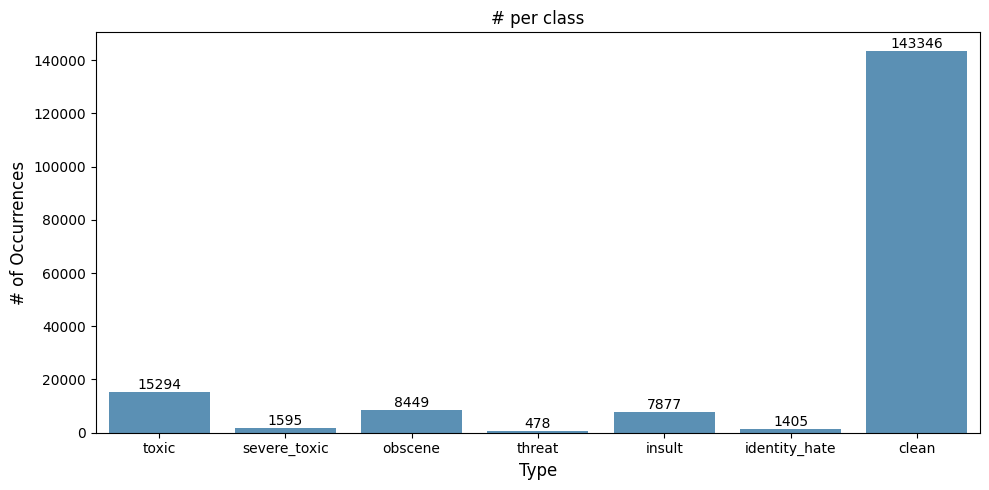

In [42]:
x = comments_df.iloc[:, 2:].sum()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type', fontsize=12)

# Adding the text labels
for rect, label in zip(ax.patches, x.values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(label),
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### The toxicity is not evenly spread out across classes. Hence we might face class imbalance problems ###

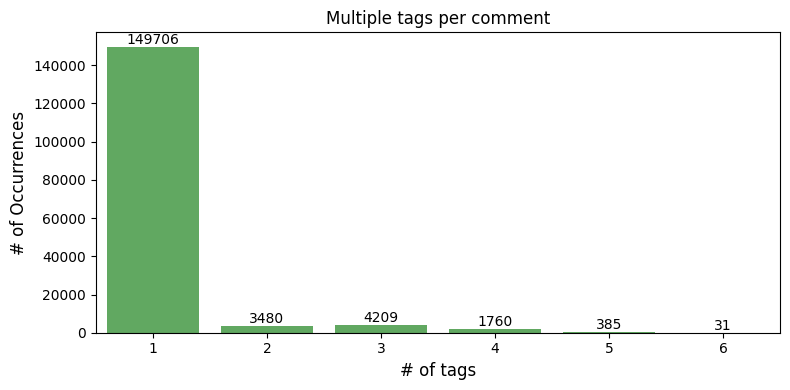

In [47]:
rowsums = comments_df.iloc[:, 2:].sum(axis=1)
x = rowsums.value_counts().sort_index()  # Sort by number of tags (optional for better visual)

color = sns.color_palette()

# Plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8, color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags', fontsize=12)

# Add text labels above bars
for rect, label in zip(ax.patches, x.values):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, int(label),
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Only ~10% of the total comments have some sort of toxicity in them. There are certain comments(20) that are marked as all of the above ###

**Which tags go together?**

**Now let's have a look at how often the tags occur together. A good indicator of that would be a correlation plot.**

<Axes: >

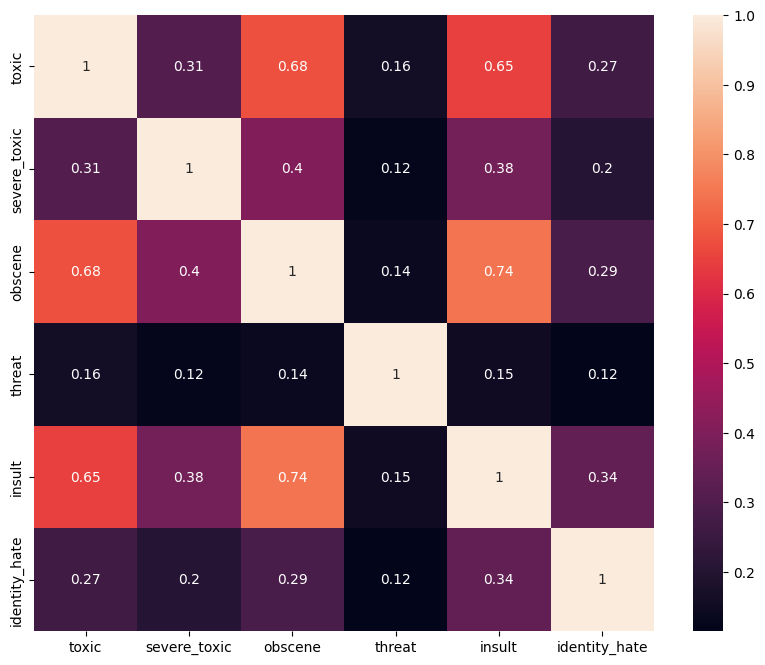

In [48]:
temp_df=comments_df.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

**The above plot indicates a pattern of co-occurance but Pandas's default Corr function which uses Pearson correlation does not apply here, since the variables invovled are Categorical (binary) variables.**

**So, to find a pattern between two categorical variables we can use other tools like**

**Confusion matrix/Crosstab**
**Cramer's V Statistic**
**Cramer's V stat is an extension of the chi-square test where the extent/strength of association is also measured**

In [49]:
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

In [50]:
#Crosstab
# Since technically a crosstab between all 6 classes is impossible to vizualize, lets take a 
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])

#cell highlighting
out = out.style.apply(highlight_min,axis=0)
out

**The above table represents the Crosstab/ consufion matix of Toxic comments with the other classes.**

**Some interesting observations:**

**A Severe toxic comment is always toxic**
**Other classes seem to be a subset of toxic barring a few exceptions**

In [52]:
#https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix/39266194
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [58]:
#Checking for Toxic and Severe toxic for now
import pandas as pd
col1="toxic"
col2="severe_toxic"
confusion_matrix = pd.crosstab(temp_df[col1], temp_df[col2])
print("Confusion matrix between toxic and severe toxic:")
print(confusion_matrix)
new_corr=cramers_corrected_stat(confusion_matrix)
print("The correlation between Toxic and Severe toxic using Cramer's stat=",new_corr)

Confusion matrix between toxic and severe toxic:
severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595
The correlation between Toxic and Severe toxic using Cramer's stat= 0.30850290540548614


### Wordclouds - Frequent words ###

In [63]:
pip install wordcloud --break-system-packages


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 2.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


🔍 Generating WordCloud for: toxic


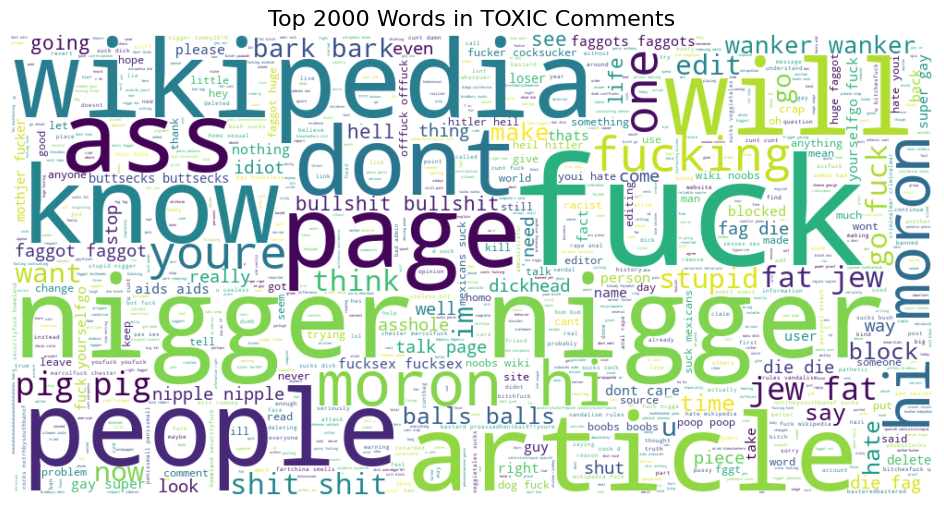

🔍 Generating WordCloud for: severe_toxic


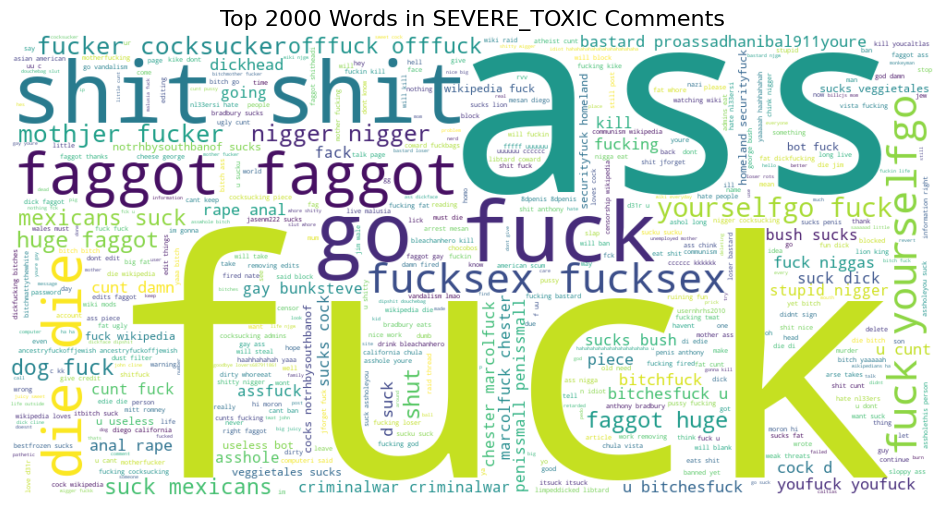

🔍 Generating WordCloud for: obscene


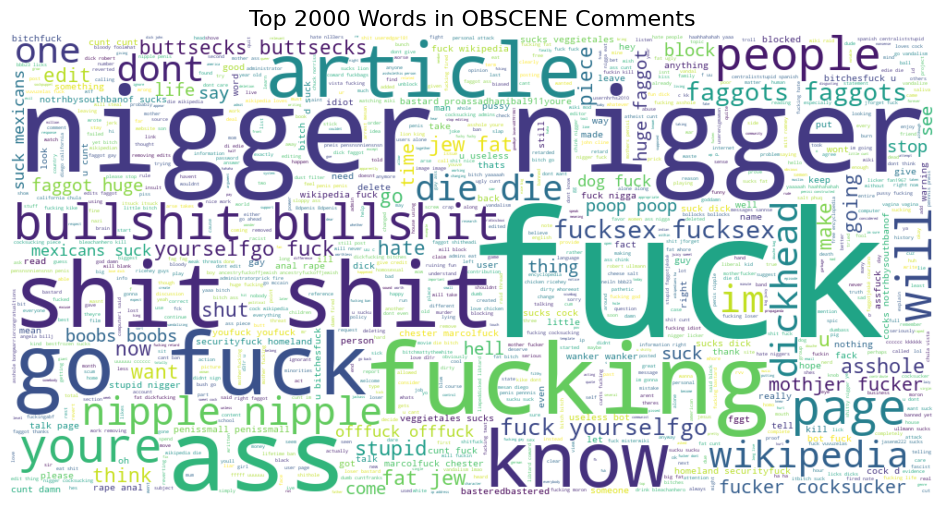

🔍 Generating WordCloud for: threat


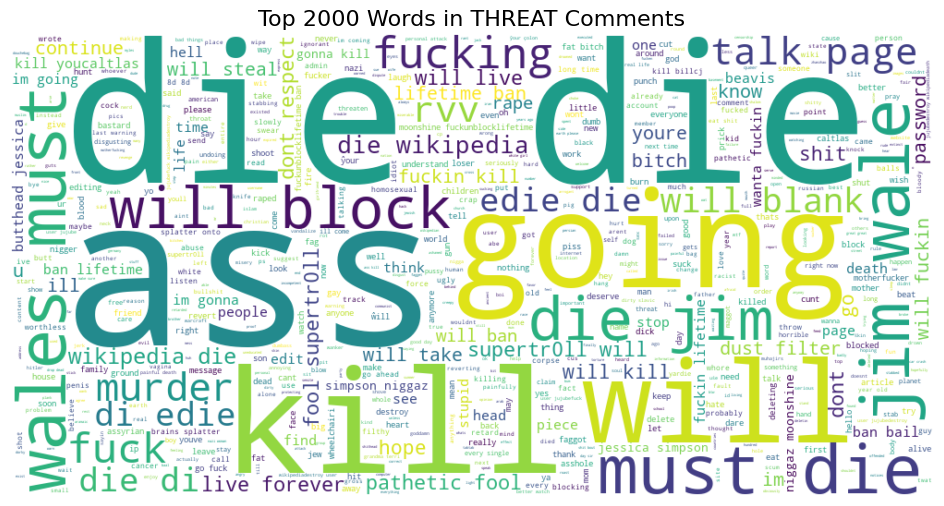

🔍 Generating WordCloud for: insult


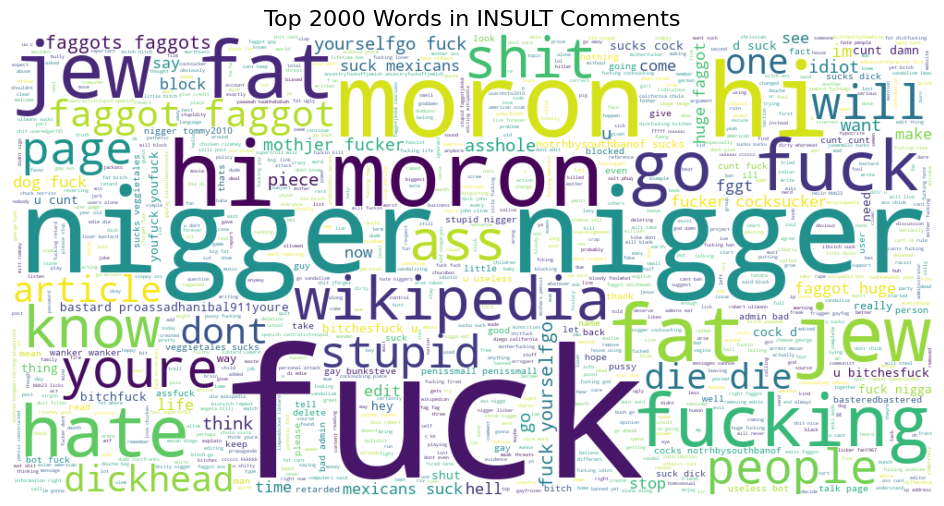

🔍 Generating WordCloud for: identity_hate


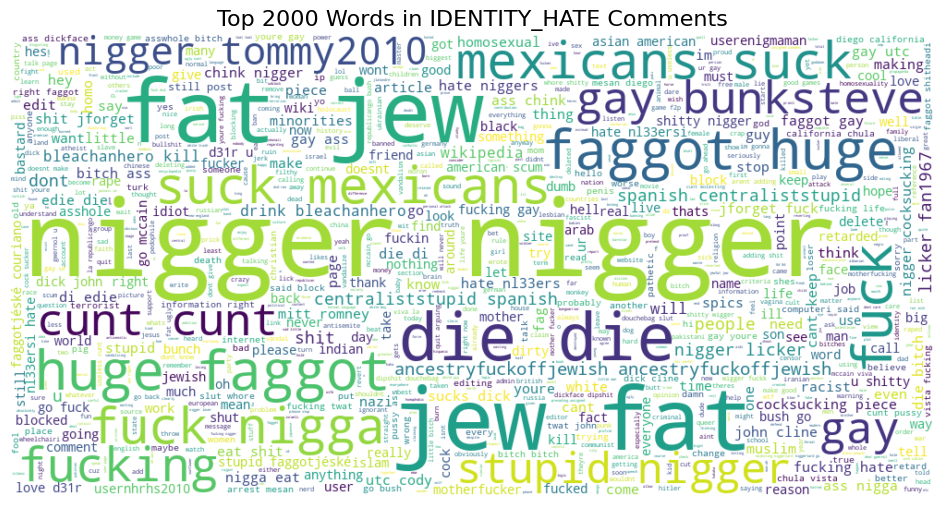


🔍 Generating WordCloud for: CLEAN comments


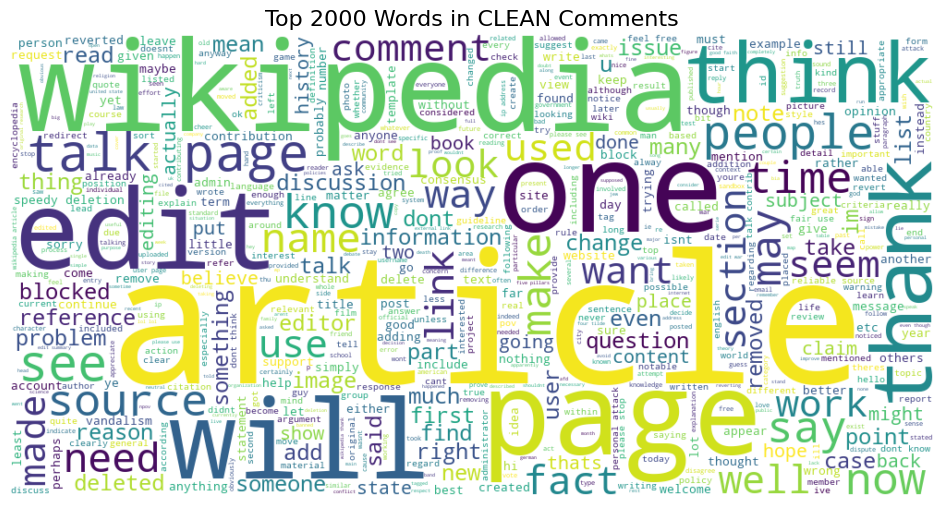

In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re

# Labels in your multi-label dataset
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Preprocessing Function
def preprocess_text(text_series):
    text_series = text_series.astype(str).str.lower()
    text_series = text_series.apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
    return ' '.join(text_series)

# WordCloud Generator
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=1000,
        height=500,
        max_words=2000,
        background_color='white',
        stopwords=STOPWORDS
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# WordCloud for each toxic label
for label in labels:
    print(f"🔍 Generating WordCloud for: {label}")
    label_comments = comments_df[comments_df[label] == 1]['comment_text']
    
    if not label_comments.empty:
        text = preprocess_text(label_comments)
        generate_wordcloud(text, f"Top 2000 Words in {label.upper()} Comments")
    else:
        print(f"⚠️ No comments found for label: {label}")

# WordCloud for CLEAN comments (clean == True)
print(f"\n🔍 Generating WordCloud for: CLEAN comments")
clean_comments = comments_df[comments_df['clean'] == True]['comment_text']

if not clean_comments.empty:
    clean_text = preprocess_text(clean_comments)
    generate_wordcloud(clean_text, "Top 2000 Words in CLEAN Comments")
else:
    print("⚠️ No clean comments found.")
